## Vornoi Tesellation 

The Voronoi diagram, or tessellation of point clouds, is a method used to partition the input space of molecular localizations into regions according to the Euclidean distance between the seed points. The resulting polygonal regions are called Voronoi cells, where each cell is centered around one seed. The Voronoi edges are equidistant from the two nearest seeds. Speciﬁcally, the projected perpendicular line from every seed to any one of its Voronoi cell edges is the shortest distance between every neighboring pair of seeds. Hence, there is no intersection between any Voronoi cells. 

The Voronoi geometric characteristics for every seed might be different based on the density and data organization and can therefore be used to describe the the neighborhood of the seeds. For instance, the Voronoi cell area is inversely proportional to the density of the seeds.

Here we aim to see the if voronoi cell poperties could be used to describe the crowding in tissue images with labelled nuclei.

In [2]:
#import libraries
%load_ext autoreload
import sys
sys.path.append("..")
from tifffile import imread
from skimage import measure
import pandas as pd
import numpy as np
import src.spatial_features.Voronoi_tessellation as VT

So we read in a image after nuclear segmentation. We use the centroids of the nuclei as inputs for the voronoi diagram. Below is the result for a given input image. The colors indicates unique nuclear labels and the white dots represents the nuclear centroids. 

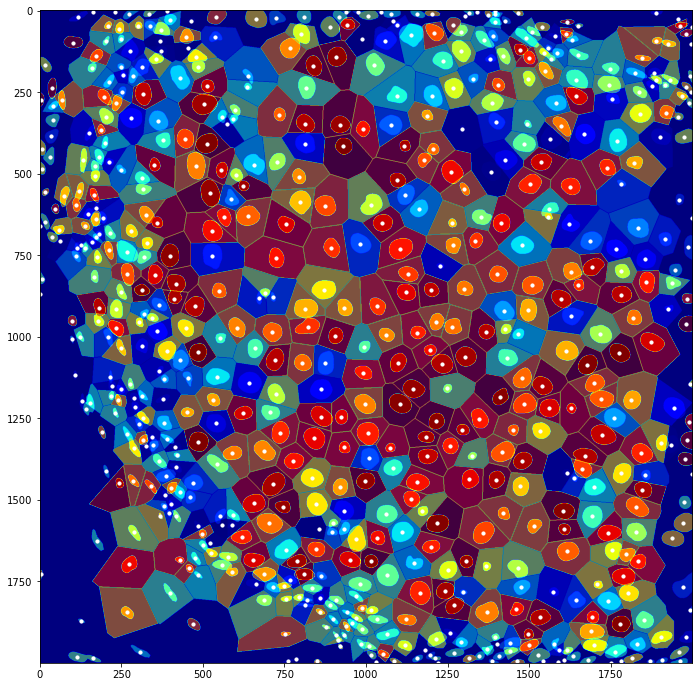

In [3]:
# Read in the image
img= imread('/home/pathy_s/Documents/TMA/Stardist_seg_results/Instance_segmentation/BR2082B_H15.tif')
img=img[4000:6000,5000:7000]
image_width=img.shape[1]
image_height=img.shape[0]
#measure nuclear positions
features=measure.regionprops_table(img,properties=('label','centroid'))
#get voronoi map
vor_image=VT.get_voronoi_map(centroids=np.stack((features['centroid-0'],features['centroid-1']),axis=1),
               labels=features['label'],img_height=image_height,img_width=image_height)
 
VT.plot_voronoi_map(img,vor_image)  

As we can see, most of the nuclei sit within the voronoi cell edges, but however there are some that overlap. This is because we just use nuclear centroids for computations and ignore the size of the nuclei. 

Now that we have a labelled voronoi cell image can also extract its geometric features. As noted above te size of a nucleus's voronoi cell is indicative of its local density; tighly packed nuclei with many neighbours will have smaller cells with more uniform shapes. An elongated cell is indicative of a cells with an asymmetrical distribution of neighbours, like around the edges of clusters. 

In [4]:
#extract geometric features
VT.extract_voronoi_cell_features(vor_image)

,label,centroid-0,centroid-1,orientation,area,perimeter,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity
0,1,1942.476834,1403.704633,-1.253839,1036,133.047727,36.319088,41.743673,33.357539,0.601193
1,11,1585.007698,831.993486,1.460859,5066,285.823376,80.313333,94.083729,70.332238,0.664206
2,16,92.605834,984.478477,-0.629986,5622,299.119841,84.605867,95.076558,76.852061,0.588747
3,24,1587.329897,552.863636,0.457803,2134,198.367532,52.125744,61.850678,49.089644,0.608336
4,51,119.548801,444.031219,-1.038861,3043,245.137085,62.245224,89.372216,49.285729,0.834197
...,...,...,...,...,...,...,...,...,...,...
543,5635,449.057030,934.186168,1.017912,14922,478.073160,137.837878,150.672789,127.976780,0.527800
544,5639,1046.336280,489.492350,0.556238,5882,317.232539,86.540135,98.488295,78.384278,0.605462
545,5641,1061.015505,1783.257352,0.367184,11222,426.901587,119.533653,132.873671,111.028922,0.549342
546,5652,1321.941410,486.479425,0.433751,6537,318.374675,91.231392,103.054536,85.205885,0.562490


For a quick extraction of features given a segmented image use the following code:

In [5]:
from src.utlis.Run_voronoi_features import extract_voronoi_features

Voronoi_features=extract_voronoi_features('/home/pathy_s/Documents/TMA/Stardist_seg_results/Instance_segmentation/BR2082B_H15.tif',
                        False)
Voronoi_features

,label,centroid-0,centroid-1,orientation,area,perimeter,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity
0,1,5942.436047,6403.643411,-1.237060,1032,132.461941,36.248906,41.721838,33.208444,0.605364
1,2,3592.883886,8261.884281,-1.504569,2532,216.160426,56.778892,70.743097,50.277288,0.703493
2,3,7165.255090,1692.267569,0.228417,7613,462.534055,98.453911,176.862066,63.004622,0.934396
3,4,7571.989409,6601.282436,-0.451814,2266,197.521861,53.713693,72.322746,41.844343,0.815627
4,5,6033.619655,7466.605401,1.472220,1333,151.296465,41.197431,55.751940,31.997774,0.818904
...,...,...,...,...,...,...,...,...,...,...
5494,5651,6800.813022,4974.742787,1.166284,12686,538.451840,127.091766,187.497071,96.968506,0.855881
5495,5652,5321.938657,5486.472388,0.434203,6537,325.445743,91.231392,103.083631,85.182776,0.563162
5496,5653,4602.883198,2796.226206,-0.108840,7029,369.002092,94.602330,128.011937,73.365637,0.819475
5497,5654,5013.492487,8240.520226,-0.375405,7787,367.404112,99.572669,133.815976,76.795928,0.818931


#### Tissue level summary:

In order to characterise the nuclear density/crowding in a given tissue, we compute the distribution characteristics of each of the above features. 

The measures available are: Median, Min, Max, Standard Deviation (SD) Coefficient of Variation (CV) and Coefficient of Dispersion (CD), Inter_Quartile_Range(IQR) and Quartile Coeeffient of Dispersrion (QCD).

In [7]:
from src.utlis.summarising_features import summarise_feature_table
summarise_feature_table(Voronoi_features.drop(['centroid-0','centroid-1','orientation'], axis=1))

,median_area,median_perimeter,median_equivalent_diameter,median_major_axis_length,median_minor_axis_length,median_eccentricity,min_area,min_perimeter,min_equivalent_diameter,min_major_axis_length,...,IQR_equivalent_diameter,IQR_major_axis_length,IQR_minor_axis_length,IQR_eccentricity,QCD_area,QCD_perimeter,QCD_equivalent_diameter,QCD_major_axis_length,QCD_minor_axis_length,QCD_eccentricity
0,4990.0,307.747258,79.708628,105.41898,64.461994,0.762726,16.0,15.0,4.513517,10.064253,...,56.674521,75.289038,47.72577,0.201757,0.610007,0.345084,0.34033,0.343375,0.348077,0.134129


### Reference

1. Okabe, Atsuyuki. "Spatial tessellations." International Encyclopedia of Geography: People, the Earth, Environment and Technology: People, the Earth, Environment and Technology (2016): 1-11.